<a href="https://colab.research.google.com/github/mcaicedovezga/Estadistica-1-/blob/main/Parte_practica__3_parcial_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estadistica descriptiva para variables cualitativas

Desarrollo parte practica tercer parcial Estadistica
Integrantes:


*   Maria Jose Caicedo Vezga 2231946
*   Angie Marieth Ortega Jaimes 2232446
*  Nixon Reynaldo Rojas Guevara 2231944


In [2]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()


Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [3]:
import io
import pandas as pd
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla.head(4)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1
11,1,1,1,NaN,1,6,5,2023,2,1,...,1,NaN,1,1,1.0,34,9,5,1.0,1


In [5]:
tabla1= tabla[["T_GES","TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


In [6]:
df2 = tabla1[(tabla1['TALLA_NAC'] != 9) & (tabla1['T_GES'] != 9)].copy()

In [7]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC=df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)


,TALLA_NAC
COD_DPTO,
23,5
11,4


In [8]:
df2.T_GES.head(2)
df2.loc[:, 'T_GES'] = df2['T_GES'].astype(str)
df2.T_GES.head(2)

/tmp/ipython-input-418164835.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '4' '4' ... '4' '4' '4']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[:, 'T_GES'] = df2['T_GES'].astype(str)


,T_GES
COD_DPTO,
23,4
11,4


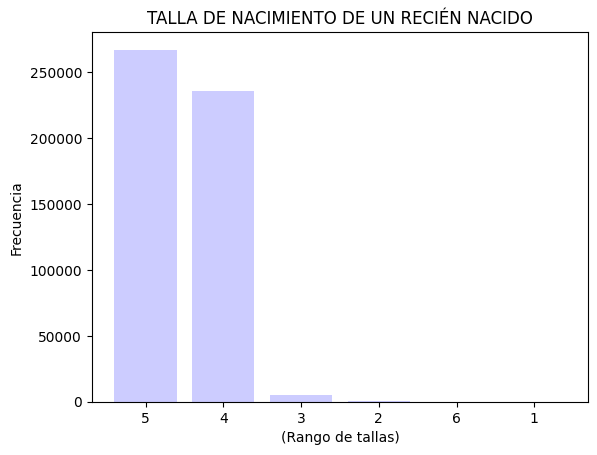

In [9]:
import matplotlib.pyplot as plt
x_values=df2.TALLA_NAC.unique()
y_values=df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values,y_values,color="#CCCCFF")

# Define the mapping for TALLA_NAC values
talla_nac_replacements = {
    "1": "<20",
    "2": "20-29",
    "3": "30-39",
    "4": "40-49",
    "5": "50-59",
    "6": ">60",
    "9": "NA"
}

# Apply the replacements to the TALLA_NAC column
df2['TALLA_NAC'] = df2['TALLA_NAC'].replace(talla_nac_replacements)

# Removed redundant import and first plt.bar call
x_values1 = df2.TALLA_NAC.unique()
y_values1 = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = '#CCCCFF') # Fixed: added quotes around #CCCCFF
plt.title('TALLA DE NACIMIENTO DE UN RECIÉN NACIDO')
ax = plt.subplot()  # Axis
ax.set_xlabel('(Rango de tallas)')
ax.set_ylabel('Frecuencia')
plt.show()

Entre 50-59 centimetros es el rango de talla donde se tienen alrededor de 270 000 recién nacidos en Colombia. En el rango de talla de 40-49 centimetro se tienen aproximadamente 240 000 recién nacidos. El rango de talla del 30-39 centrimetro tiene cerca de 5 000 recién nacidos, mostrando una frecuencia muy baja en comparación con los valores 50-59 y 40-49.

y los otros valores tienen cantidades casi nulas de recién nacidos registrados en Colombia.

In [10]:
import numpy as np
sizes=np.array(y_values1)
sizes

array([267220, 236205,   5071,    307,     20,      4])

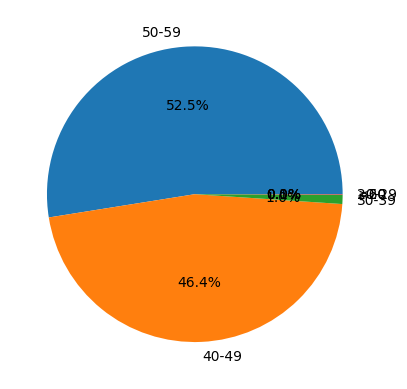

In [11]:
plt.pie(y_values1,labels=x_values1,autopct='%1.1f%%')
plt.show()

In [12]:
len(df2.TALLA_NAC)

508827

In [25]:
Porcentaje=[(x/len(df2.TALLA_NAC))*100for x in y_values1]
print(x_values1)
print(Porcentaje)

['50-59' '40-49' '30-39' '20-29' '>60' '<20']
[52.516867225992335, 46.421475275486564, 0.9966059191041355, 0.060334848583113714, 0.0039306090282158765, 0.0007861218056431753]


<>:1: SyntaxWarning: invalid decimal literal
<>:1: SyntaxWarning: invalid decimal literal
/tmp/ipython-input-2780431945.py:1: SyntaxWarning: invalid decimal literal
  Porcentaje=[(x/len(df2.TALLA_NAC))*100for x in y_values1]


Aproximadamente el 52.52% de los recién nacidos en Colombia tiene una talla entre 50 y 59 cm, mientras que el 46.42% mide entre 40 y 49 cm. Solo el 0.997% de los bebés tiene una talla entre 30 y 39 cm, el 0.060% entre 20 y 29 cm, el 0.0039% supera los 60 cm, y únicamente el 0.00078% registra una talla menor a 20 cm.

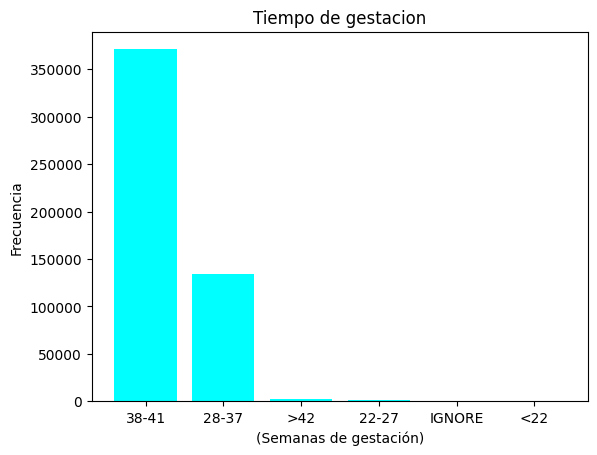

In [14]:
import matplotlib.pyplot as plt

# Define the mapping for T_GES values
t_ges_replacements = { # Renamed from T_GES.replacements to a local variable
    "1": "<22",
    "2": "22-27",
    "3": "28-37",
    "4": "38-41",
    "5": ">42",
    "6": "IGNORE",
    "9": "NA"
}

# Apply the replacements to the T_GES column
df2['T_GES'] = df2['T_GES'].replace(t_ges_replacements)

# Generate x_values and y_values from the modified T_GES column for plotting
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()

# Plot the T_GES data
plt.bar(x_values, y_values, color = 'cyan') # Using Cyan as in the original first bar plot call in this cell
plt.title('Tiempo de gestacion')
ax = plt.subplot()
ax.set_xlabel('(Semanas de gestación)')
ax.set_ylabel('Frecuencia')
plt.show()

El valor de 38-41 semanas es el rango de gestación donde se tienen alrededor de 370 000 recién nacidos en Colombia. En el rango 28-37 semanas se tienen aproximadamente 135 000 recién nacidos.

Los otros valores presentan cantidades muy bajas, con menos de 5 000 recién nacidos en cada uno de estos rangos de gestación en Colombia.

In [15]:
import numpy as np
sizes=np.array(y_values)
sizes

array([371090, 134513,   1950,    778,    477,     19])

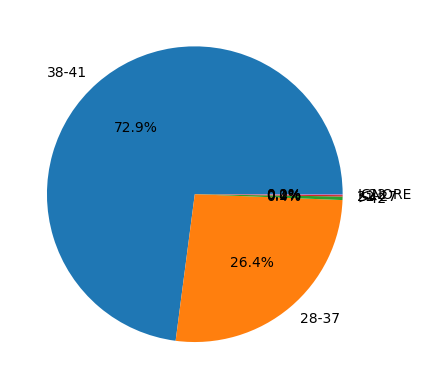

In [16]:
plt.pie(y_values,labels=x_values,autopct='%1.1f%%')
plt.show()

In [17]:
len(df2.T_GES)

508827

In [18]:
Porcentaje=[(x/len(df2.T_GES))*100for x in y_values]
print(x_values)
print(Porcentaje)

['38-41' '28-37' '>42' '22-27' 'IGNORE' '<22']
[72.93048521403149, 26.43590061062011, 0.383234380251048, 0.1529006911975976, 0.09374502532294866, 0.003734078576805083]


<>:1: SyntaxWarning: invalid decimal literal
<>:1: SyntaxWarning: invalid decimal literal
/tmp/ipython-input-3702679508.py:1: SyntaxWarning: invalid decimal literal
  Porcentaje=[(x/len(df2.T_GES))*100for x in y_values]


La mayor proporción se concentra en el rango 38-41 semanas, que representa cerca del 72.9%, seguido por el grupo de 28-37 semanas, con un 26.4%. Los demás rangos —>42, 22-27, IG y <22— representan porcentajes muy bajos, cada uno por debajo del 1%, lo que muestra que los embarazos duran aproximadamente entre 28 y 41 semanas

#Tablas de contingencia



*   Representación gráfica de una tabla de contingencia
*   Proporciones asociadas a una tabla de contingencia



In [19]:
df2.loc[df2.TALLA_NAC == '1', "TALLA_NAC"] = "<20"
df2.loc[df2.TALLA_NAC == '2', "TALLA_NAC"] = "20-29"
df2.loc[df2.TALLA_NAC == '3', "TALLA_NAC"] = "30-39"
df2.loc[df2.TALLA_NAC == '4', "TALLA_NAC"] = "40-49"
df2.loc[df2.TALLA_NAC == '5', "TALLA_NAC"] = "50-59"
df2.loc[df2.TALLA_NAC == '6', "TALLA_NAC"] = ">60" # Corrected typo, previously targeted T_GES
df2.loc[df2.T_GES == '1', "T_GES"] = "<22"
df2.loc[df2.T_GES == '2', "T_GES"] = "22-27"
df2.loc[df2.T_GES == '3', "T_GES"] = "28-37"
df2.loc[df2.T_GES == '4', "T_GES"] = "38-41"
df2.loc[df2.T_GES == '5', "T_GES"] = ">42"
df2.loc[df2.T_GES == '6', "T_GES"] = "IGNORE"

# These astype(str) calls are redundant as the columns already contain string values
# df2.TALLA_NAC=df2.TALLA_NAC.astype(str)

df2.head(3)

,T_GES,TALLA_NAC
COD_DPTO,,
23,38-41,50-59
11,38-41,40-49
11,38-41,40-49


In [20]:
tabla_cont = pd.crosstab(df2['TALLA_NAC'],df2['T_GES'])
tabla_cont

T_GES,22-27,28-37,38-41,<22,>42,IGNORE
TALLA_NAC,,,,,,
20-29,251,44,0,11,0,1
30-39,1646,3357,46,5,0,17
40-49,50,95455,140106,0,116,478
50-59,1,35657,230919,1,360,282
<20,2,0,0,2,0,0
>60,0,0,19,0,1,0


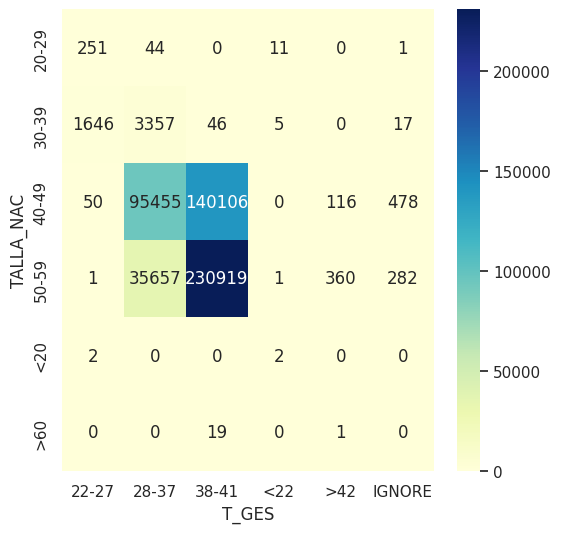

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
heatmap = sns.heatmap(tabla_cont, annot=True ,fmt='d', cmap="YlGnBu" , cbar=True)
plt.show()

Con ella podemos hallar las probabilidades condicionales por ejemplo:
Por ejemplo si queremos:
P(T_GES = 28–37 | TALLA_NAC = 40–49) Esto es igual a

Frecuencia en la celda (40–49, 28–37): 95,455 sobre el

Total de la fila 40–49: 235,205

Cálculamos :
P = 95,455 / 235,205 = 0.4058 y asi con todas

La siguiente tabla corresponde a P(Gestación/Talla)

| Talla_NAC | 22–27  | 28–37  | 38–41  | <22   | >42  | IGNORE |
|-----------|--------|--------|--------|-------|------|---------|
| 20–29     | 81.76% | 14.33% | 0.00%  | 3.58% | 0.00% | 0.33% |
| 30–39     | 32.46% | 66.20% | 0.91%  | 0.10% | 0.00% | 0.34% |
| 40–49     | 0.02%  | 40.41% | 59.32% | 0.00% | 0.05% | 0.20% |
| 50–59     | 0.00%  | 13.34% | 86.42% | 0.00% | 0.13% | 0.11% |
| <20       | 50.00% | 0.00%  | 0.00%  | 50.00%| 0.00% | 0.00% |
| >60       | 0.00%  | 0.00%  | 95.00% | 0.00% | 5.00% | 0.00% |


Esto representa la probabilidad de estar en un cierto rango de semanas de gestación dado que se conoce la talla al nacer.

Ahora a continuación

La siguiente tabla corresponde a P(Talla/Gestación)

| Talla_NAC | 22–27  | 28–37  | 38–41  | <22   | >42   | IGNORE |
|-----------|--------|--------|--------|--------|--------|---------|
| 20–29     | 12.04% | 0.92%  | 0.00%  | 71.43% | 0.00%  | 0.20%  |
| 30–39     | 78.99% | 69.35% | 0.02%  | 32.47% | 0.00%  | 3.42%  |
| 40–49     | 2.40%  | 19.72% | 37.68% | 0.00%  | 24.06% | 96.17% |
| 50–59     | 0.48%  | 7.36%  | 62.13% | 6.35%  | 74.77% | 0.00%  |
| <20       | 4.82%  | 0.00%  | 0.00%  | 20.63% | 0.00%  | 0.00%  |
| >60       | 1.26%  | 0.39%  | 0.03%  | 0.00%  | 1.17%  | 0.00%  |

Esta tabla nos muestra la probabilidad de que un recién nacido tenga una cierta talla, dado que ya sabemos en qué rango de semanas de gestación nació.

In [22]:
import scipy.stats as stats
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"EL valor estadistico de Chi al cuadrado es : {chi} y el valor p es d {valor_p}" )


EL valor estadistico de Chi al cuadrado es : 283302.7467337464 y el valor p es d 0.0



Si el valor p < 0.05 se rechaza la hipótesis nula.

Si el valor p > 0.05 no se rechaza la hipótesis nula.

Como el valor p = 0.0 < 0.05, se rechaza la hipótesis nula. Con una confianza del 95% que  la talla de nacimiento y el tiempo de gestación están asociados para los individuos recién nacidos en Colombia.


In [23]:
import math

coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df2.T_GES))
coeficiente_v_cramer = math.sqrt((chi/(len(df2.T_GES)*min(6-1, 6-1))))

print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")


Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5980358668183134, 0.7461743542999918 y 0.33369931585635887


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. Biometrics, 159-174, el cual se puede consultar en el siguiente link:
https://www.jstor.org/stable/2529310
,
se tiene que la talla de nacimientos y el tiempo de gestación están insignificativamente asociados.

Interpretación general

Y depende moderadamente de X

X y Y son moderadamente homogéneas

X y Y están moderadamente asociadas

Donde
__ = nula (Chi, ϕ, V ≈ 0),
__ = insignificativamente (0 < Chi, ϕ, V < 0.2),
__ = discretamente (0.2 < Chi, ϕ, V < 0.4),
__ = moderadamente (0.4 < Chi, ϕ, V < 0.6),
__ = sustancialmente (0.6 < Chi, ϕ, V < 0.8),
y __ = fuertemente (0.8 < Chi, ϕ, V < 1)